In [28]:
import numpy as np
import scipy
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
from statistics import median, mean, quantiles, stdev

df = pd.read_csv("heart.csv")

# Prints the 5 number summary and the mean and standard deviation
def summary(data):
    data.sort()
    minimum = min(data)
    maximum = max(data)
    q = quantiles(data)
    ave = mean(data)
    std = stdev(data)
    first = "Mean: {ave:.2f}, Standard Deviation: {std:.2f}"
    second = "Min: {}, Q1: {}, Median: {}, Q3: {}, Max: {}"
    print(first.format(ave=ave, std=std))
    print(second.format(minimum, q[0], q[1], q[2], maximum))

# Exploring Data
Attributes:  
age  
sex  
chest pain type (4 values)  
resting blood pressure  
serum cholestoral in mg/dl  
fasting blood sugar > 120 mg/dl  
resting electrocardiographic results (values 0,1,2)  
maximum heart rate achieved  
exercise induced angina  
oldpeak = ST depression induced by exercise relative to rest  
the slope of the peak exercise ST segment  
number of major vessels (0-3) colored by flourosopy  
thal: 3 = normal; 6 = fixed defect; 7 = reversable defect  

The data is first and foremost, balanced and is rather small for a complex problem. This means the big deep learning methods are difficult or out (e.g. Random Forests, CNNs).

Thoughts right now are perhaps some PCA for some dimensional reduction and cluster analysis. I'm also thinking some basic logistic regression. My money is on SVM being the most useful for this data

We may also need to control for data. Obviously, there is a bit of confounding in age. Maybe control for sex as well?

In [35]:
ages = df['age'].tolist()
classes = df['target'].tolist()
sex = df['sex'].tolist()
chol = df['chol'].tolist()

print("ages:")
summary(ages)
print("\nchol:")
summary(chol)

ages:
Mean: 54.37, Standard Deviation: 9.08
Min: 29, Q1: 47.0, Median: 55.0, Q3: 61.0, Max: 77

chol:
Mean: 246.26, Standard Deviation: 51.83
Min: 126, Q1: 211.0, Median: 240.0, Q3: 275.0, Max: 564


(array([ 7., 40., 93., 82., 50., 23.,  3.,  4.,  0.,  0.,  0.,  1.]),
 array([126. , 162.5, 199. , 235.5, 272. , 308.5, 345. , 381.5, 418. ,
        454.5, 491. , 527.5, 564. ]),
 <BarContainer object of 12 artists>)

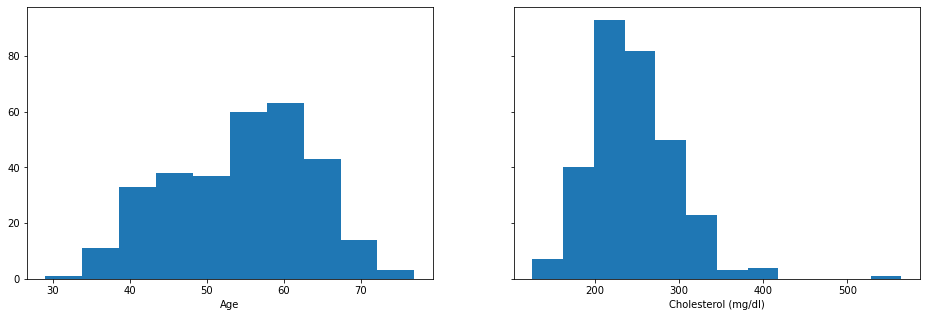

In [75]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize= (16, 5))
axs[0].set_xlabel("Age")
axs[1].set_xlabel("Cholesterol (mg/dl)")
axs[0].hist(ages, bins=10)
axs[1].hist(chol, bins=12)

(array([ 0.,  2., 18., 50., 47., 18.,  1.,  2.,  0.,  0.,  0.]),
 array([ 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600]),
 <BarContainer object of 11 artists>)

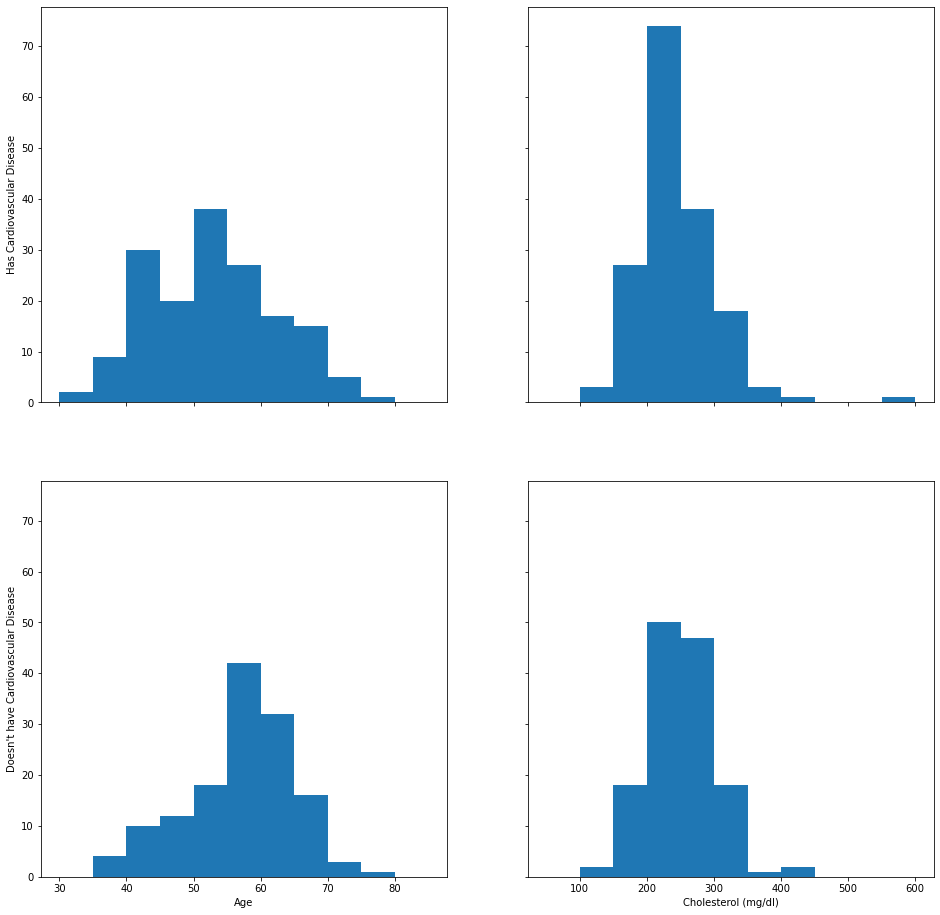

In [76]:
sick = df[df['target'] == 1]
nonsick = df[df['target'] == 0]
sick['age'].tolist()

fig, axs = plt.subplots(2, 2, sharey='all', sharex='col', figsize=(16, 16))
axs[0, 0].set_ylabel("Has Cardiovascular Disease")
axs[0, 0].hist(sick['age'].tolist(), bins=[i for i in range(30, 90, 5)])
axs[1, 0].set_xlabel("Age")
axs[1, 0].set_ylabel("Doesn't have Cardiovascular Disease")
axs[1, 0].hist(nonsick['age'].tolist(), bins=[i for i in range(30, 90, 5)])
axs[0, 1].hist(sick['chol'].tolist(), bins=[i for i in range(50, 650, 50)])
axs[1, 1].set_xlabel("Cholesterol (mg/dl)")
axs[1, 1].hist(nonsick['chol'].tolist(), bins=[i for i in range(50, 650, 50)])

In [ ]:
# Need to perform PCA. May do controls for age and sex. Remember to remove